In [49]:
import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, NaiveBayesClassifier , classify
from sklearn.naive_bayes import GaussianNB
import re, string, random
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/labsuser/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/labsuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/labsuser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/labsuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/labsuser/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/labsuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
def remove_noise(tweet_tokens, stop_words=()):

  cleaned_tokens = []
  
  for token, tag in pos_tag(tweet_tokens):
    token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                   '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
    token = re.sub ("(@[A-Za-z0-9_+])","", token)

    if tag.startswith("NN"):
        pos = 'n'
    
    elif tag.startswith('VB'):
        pos = 'v'

    else:
        pos = 'a'
    
    lemmatizer = WordNetLemmatizer() #Gives us parts of speech for different words in each of the Tweets
    token = lemmatizer.lemmatize(token, pos)

    if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
       cleaned_tokens.append(token.lower())
  return cleaned_tokens

#Word Density 
def get_all_words(cleaned_tokens_list):
        try:
            for tokens in cleaned_tokens_list:
              for token in tokens:
                  yield token
        except NameError:
            return "NameError occurred. Some variable isn't defined."
#Converting Tokens to a Dictionary
def get_tweets_for_model(cleaned_tokens_list):
  for tweet_tokens in cleaned_tokens_list:
      yield dict([token,True] for token in tweet_tokens)

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# print(pos_tag(tweet_tokens[0]))

stop_words = stopwords.words('english')

In [29]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

#print(pos_tag(tweet_tokens[0]))

stop_words = stopwords.words('english')

positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

print(positive_tweet_tokens)
#After tokenizing we can see the different words

[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!'], ['@97sides', 'CONGRATS', ':)'], ['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days'], ['@BhaktisBanter', '@PallaviRuhail', 'This', 'one', 'is', 'irresistible', ':)', '#FlipkartFashionFriday', 'http://t.co/EbZ0L2VENM'], ['We', "don't", 'like', 'to', 'keep', 'our', 'lovely', 'customers', 'waiting', 'for', 'long', '!', 'W

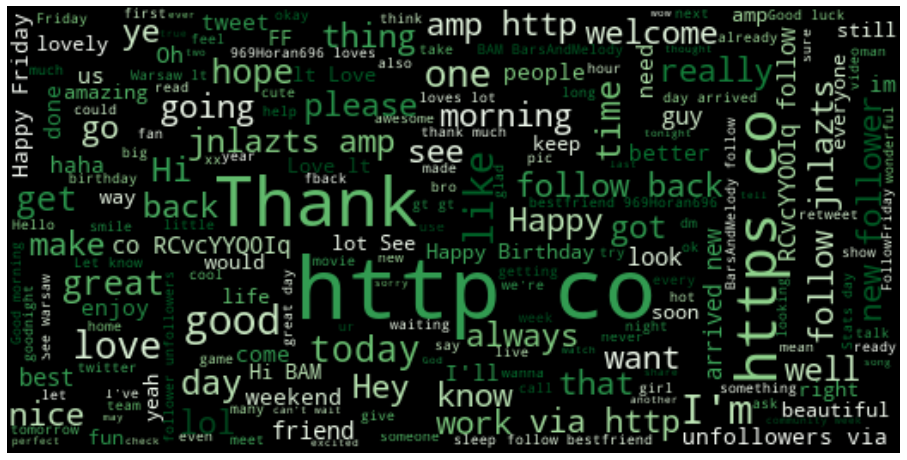

In [30]:
#Wordcloud +
positive_tweets_string=(" ").join(positive_tweets)

positive_tweets_cloud = WordCloud(width = 520, height=260, stopwords = stop_words, max_font_size=50,
                        background_color= "black"
                        , colormap='Greens').generate(positive_tweets_string)

plt.figure(figsize=(16,10))
plt.imshow(positive_tweets_cloud,interpolation='bilinear')
plt.axis('off') #turn off axis
plt.show()

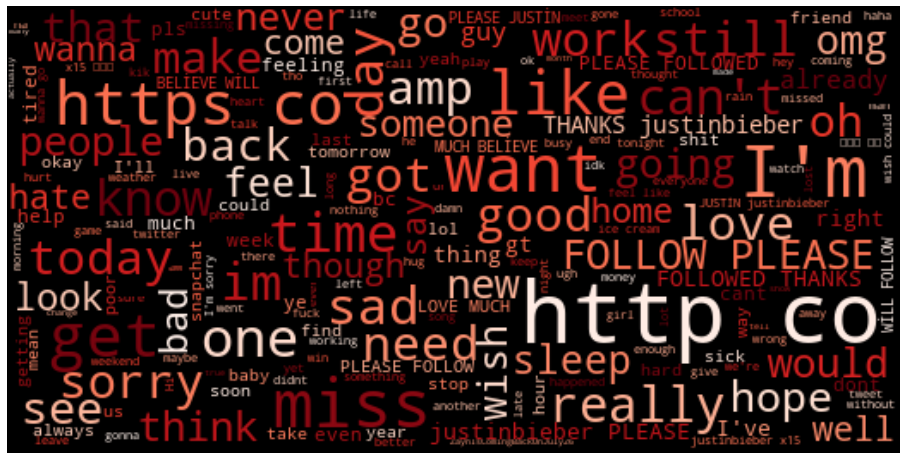

In [31]:
# Wordcloud - 
negative_tweets_string=(" ").join(negative_tweets)

negative_tweets_cloud = WordCloud(width = 520, height = 260, stopwords=stop_words, max_font_size=50, background_color ="Black", colormap='Reds').generate(negative_tweets_string)
plt.figure(figsize=(16,10))
plt.imshow(negative_tweets_cloud, interpolation='bilinear')
plt.axis('off') #turn off axis
plt.show()

In [32]:
positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

print(positive_cleaned_tokens_list)

[['#followfriday', 'rance_inte', 'kuchly57', 'ilipol_paris', 'top', 'engage', 'member', 'community', 'week', ':)'], ['amb2ja', 'hey', 'james', 'odd', ':/', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', ':)', 'many', 'thanks'], ['espiteofficial', 'listen', 'last', 'night', ':)', 'bleed', 'amazing', 'track', 'scotland'], ['7sides', 'congrats', ':)'], ['yeaaaah', 'yippppy', 'accnt', 'verify', 'rqst', 'succeed', 'get', 'blue', 'tick', 'mark', 'fb', 'profile', ':)', '15', 'day'], ['haktisbanter', 'allaviruhail', 'one', 'irresistible', ':)', '#flipkartfashionfriday'], ['like', 'keep', 'lovely', 'customer', 'wait', 'long', 'hope', 'enjoy', 'happy', 'friday', 'lwwf', ':)'], ['mpatientraider', 'second', 'thought', '’', 'enough', 'time', 'dd', ':)', 'new', 'short', 'enter', 'system', 'sheep', 'must', 'buy'], ['jgh', 'go', 'bayan', ':d', 'bye'], ['act', 'mischievousness', 'call', 'etl', 'layer', 'in-house', 'warehouse', 'app', 'katamari', 'well', '…', 'name', 'imply', ':

In [35]:
all_pos_words = get_all_words(positive_cleaned_tokens_list)
freq_dist_pos = FreqDist(all_pos_words)

print(freq_dist_pos)
print(freq_dist_pos.most_common(10))

<FreqDist with 11877 samples and 39597 outcomes>
[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


In [36]:
positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

positive_dataset = [(tweet_dict, "Positive")
  for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
  for tweet_dict in negative_tokens_for_model]

print(positive_dataset)

[({'#followfriday': True, 'rance_inte': True, 'kuchly57': True, 'ilipol_paris': True, 'top': True, 'engage': True, 'member': True, 'community': True, 'week': True, ':)': True}, 'Positive'), ({'amb2ja': True, 'hey': True, 'james': True, 'odd': True, ':/': True, 'please': True, 'call': True, 'contact': True, 'centre': True, '02392441234': True, 'able': True, 'assist': True, ':)': True, 'many': True, 'thanks': True}, 'Positive'), ({'espiteofficial': True, 'listen': True, 'last': True, 'night': True, ':)': True, 'bleed': True, 'amazing': True, 'track': True, 'scotland': True}, 'Positive'), ({'7sides': True, 'congrats': True, ':)': True}, 'Positive'), ({'yeaaaah': True, 'yippppy': True, 'accnt': True, 'verify': True, 'rqst': True, 'succeed': True, 'get': True, 'blue': True, 'tick': True, 'mark': True, 'fb': True, 'profile': True, ':)': True, '15': True, 'day': True}, 'Positive'), ({'haktisbanter': True, 'allaviruhail': True, 'one': True, 'irresistible': True, ':)': True, '#flipkartfashionfr

In [44]:
dataset = positive_dataset + negative_dataset
random.shuffle(dataset) #Shuffle for randomness

#Split the data set
train_data = dataset[:7000]
test_data = dataset[7000:]

classifier = NaiveBayesClassifier.train(train_data)

In [45]:
print("Accuracy is:", classify.accuracy(classifier, test_data))

Accuracy is: 0.9956666666666667


In [46]:
#Test

custom_tweet = "I had pad thai and it was the best meal in a while. Loved the atmosphere."
custom_tokens = remove_noise(word_tokenize(custom_tweet))
print(custom_tweet)
print(classifier.classify(dict([token, True] for token in custom_tokens)))

I had pad thai and it was the best meal in a while. Loved the atmosphere.
Positive


In [47]:
custom_tweet = "Burn in hell"
custom_tokens = remove_noise(word_tokenize(custom_tweet))
print(custom_tweet)
print(classifier.classify(dict([token, True] for token in custom_tokens)))

Burn in hell
Negative


In [52]:
custom_tweet = "I will never come back"
custom_tokens = remove_noise(word_tokenize(custom_tweet))
print(custom_tweet)
print(classifier.classify(dict([token, True] for token in custom_tokens)))

I will never come back
Negative
